## Using color in your visualizations

Color is a powerful tool for encoded values in data visualization. However, with this power comes danger. In this chapter, we talk about how to choose an appropriate color palette for your visualization based upon the type of data it is showing.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
pollution = pd.read_csv('pollution_wide.csv')

### Getting rid of unnecessary color

You might want to compare the relationship CO to $NO_2$ values across cities using a simple scatter plot with color to differentiate the different cities' data.

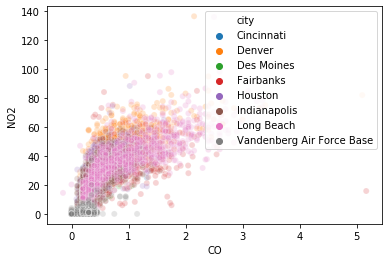

In [4]:
# Hard to read scatter of CO and NO2 w/ color mapped to city
sns.scatterplot('CO', 'NO2',
                alpha = 0.2,
                hue = 'city',
                data = pollution)


Unfortunately, the resulting plot is very convoluted. It's hard to make out differences between the cities because one has to differentiate between similar colors. It turns out that sometimes the best color palette for your plot is no color at all.

To remedy this hard-to-read chart, get rid of the color component and facet by each city. While the resulting plot may not be as pretty, it will be a much better tool to decipher the differences.

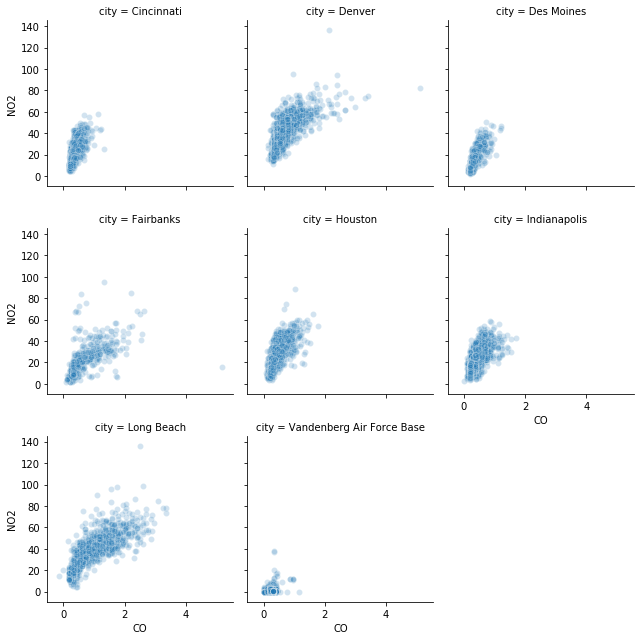

In [5]:
# Setup a facet grid to separate the cities apart
# Pass to plotting function the pollution data, map the city to the columns, and make the facet three columns wide.
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
# Use the g.map() function to map a scatterplot() over our grid 
# with the same aesthetic as the original scatter but without the hue argument.
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2)


### Fixing Seaborn's bar charts

Seaborn's default values for the colors of bars in a bar chart are not ideal for the most accurate perception. By drawing each bar as a different color, there is a risk of the viewer seeing two identical sized bars as different sizes as people tend to see some colors as 'larger' than others.

C:\Users\Jacob\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


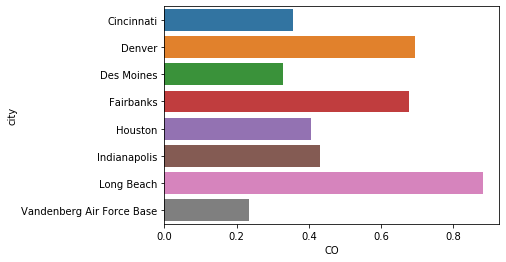

In [6]:
import numpy as np

# Default coloring
sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
              ci = False,
              data = pollution
              )

We discussed two easy ways to fix this. First, to put a border around the bars; second, change all bar colors to the same value. Try both of these solutions on our pollution data.

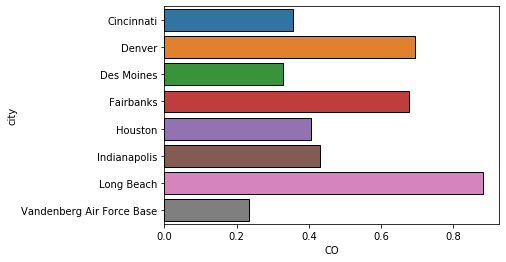

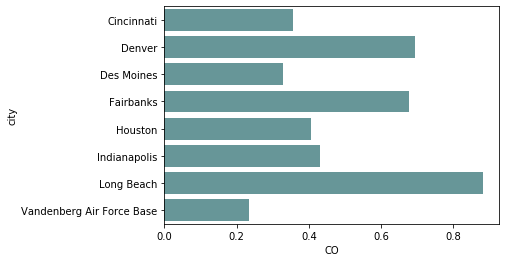

In [7]:
# Modify the default barplot by adding a black border around each bar
sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
              ci = False,
              data = pollution,
              # Add a border to the bars
              edgecolor = 'black')

plt.show()

# Now, make your plot more perceptually precise by coloring all bars 'cadetblue'
sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
              ci = False,
              data = pollution,
              # Replace border with bar colors
              color = 'cadetblue')

### Making a custom continuous palette

You are interested in the pollution levels of Cincinnati for the year 2014. Specifically, you're interested in CO and $NO_2$, so you make a simple scatter plot to show the relationship between the two pollutants.

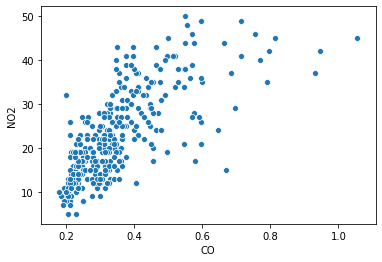

In [8]:
# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

sns.scatterplot(x='CO', y='NO2', data=cinci_2014)

However, there may be some interesting information in how the value of $O_3$ relates to the two plotted pollutants, so you decide to color the points by their $O_3$ levels. To do this, you need to define an appropriate continuous palette and map your `O3` column to it in your scatter plot.

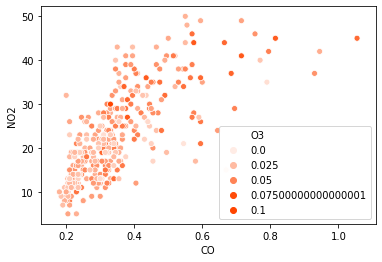

In [9]:
# Define a custom continuous color palette that continuously maps from white to 'orangered'
color_palette = sns.light_palette('orangered',
                         as_cmap = True)

# Plot mapping the color of the points with custom palette
sns.scatterplot(x = 'CO',
                y = 'NO2',
                # Map the column for O3 values to the color of the points.
                hue = 'O3', 
                data = cinci_2014,
                # Pass your created palette to the plotting function.
                palette = color_palette)


### Customizing a diverging palette heatmap

The default color scheme used by Seaborn's `heatmap()` doesn't give the value of 0 any special treatment. This is fine for instances when 0 isn't special for the variable you're visualizing but means you will need to customize the palette when 0 is special, such as when it represents a neutral value.

For this visualization, you want to compare all the cities against the average pollution value for CO in November 2015. (As is provided in the DataFrame `nov_2015_CO`).

To do this, use a heat map to encode the number of standard deviations away from the average each city's CO pollution was for the day. You'll need to replace the default palette by creating your own custom diverging palette and passing it to the heatmap and informing the function what your neutral value is.

In [47]:
nov_CO = pollution.query("month == 11")[['city', 'CO']].groupby('city').mean()
nov_CO.columns = ['mean']
display(nov_CO)

# Query Nov-2015 and Select city, day, and CO columns
nov_2015_CO=pollution.query("(month  ==  11) & (year  ==  2015)")[['city', 'day', 'CO']]

# What day of year is Nov, 1?
day_min = nov_2015_CO['day'].min()
nov_2015_CO.day = nov_2015_CO.day.sub(day_min, axis=0)

nov_2015_CO = nov_2015_CO.pivot(index='city', columns='day', values='CO')
nov_2015_CO = nov_2015_CO.sub(nov_CO['mean'], axis=0)

display(nov_2015_CO)


,mean
city,
Cincinnati,0.379099
Denver,1.009565
Fairbanks,1.216176
Houston,0.450217
Indianapolis,0.434940
Long Beach,1.240464
Vandenberg Air Force Base,0.218750


day,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
city,,,,,,,,,,,,,,,,,,,,,
Cincinnati,NaN,NaN,NaN,NaN,NaN,-0.077099,-0.045099,0.069901,0.093401,0.378401,...,0.047901,0.166401,0.441901,0.511401,0.237401,-0.080599,-0.090599,-0.042599,-0.165099,0.021401
Denver,-0.359565,0.090435,-0.459565,-0.359565,-0.459565,-0.409565,-0.009565,-0.009565,-0.009565,0.490435,...,-0.459565,-0.209565,0.540435,0.140435,0.040435,-0.659565,-0.659565,-0.609565,-0.559565,-0.459565
Fairbanks,-0.646176,-0.746176,-0.136176,-0.401176,-0.456176,-0.786176,-0.506176,-0.731176,-0.501176,0.038824,...,NaN,NaN,NaN,-0.781176,-0.116176,-0.621176,-0.111176,-0.236176,0.628824,0.473824
Houston,-0.084217,0.222783,0.071283,-0.017717,-0.205217,-0.075217,-0.229717,-0.219717,0.110283,0.268783,...,-0.148717,0.417783,0.307783,0.145783,-0.228717,-0.256217,-0.240717,-0.167217,-0.197717,-0.014717
Indianapolis,0.515060,0.765060,1.265060,0.665060,-0.084940,-0.184940,-0.084940,0.315060,0.265060,0.265060,...,-0.034940,-0.084940,-0.084940,0.815060,-0.034940,-0.184940,-0.184940,-0.234940,-0.234940,-0.084940
Long Beach,0.309536,-0.690464,-0.740464,-0.390464,-0.290464,0.159536,0.759536,0.409536,-0.090464,-0.690464,...,1.009536,-0.040464,0.459536,0.259536,-0.990464,0.009536,-0.240464,-0.240464,-0.290464,-0.090464
Vandenberg Air Force Base,-0.118750,-0.168750,-0.118750,-0.018750,-0.018750,-0.018750,-0.018750,-0.018750,0.081250,0.081250,...,-0.018750,0.031250,0.081250,0.031250,-0.018750,-0.018750,-0.018750,-0.018750,-0.018750,-0.018750


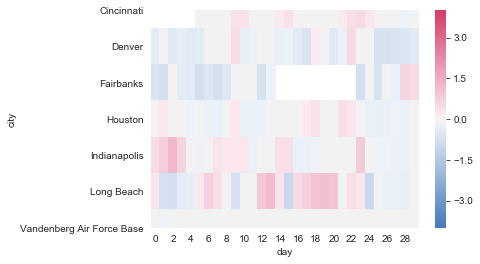

In [48]:
sns.set_style("white")

# Define a custom palette
color_palette = sns.diverging_palette(250, 0, as_cmap = True)

# Pass palette to plot and set axis ranges
sns.heatmap(nov_2015_CO,
            cmap = color_palette,
            center = 0,
            vmin = -4,
            vmax = 4)
plt.yticks(rotation = 0)
plt.show()

### Adjusting your palette according to context

You've been asked to make a figure for your company's website. The website has a slick black theme, and it would be pretty jarring if your plot were white. To make your plot match the company aesthetic, you can swap the background to a black one with `plt.style.use("dark_background")`.

The figure you've been asked to make plots CO values during November 2015 for various cities (provided as `nov_2015_CO`). You will plot this as a heatmap with the color of each cell encoding how many standard deviations from the overall average O3 value the measurement falls. Due to the website's dark background, you will want to adjust your color palette to encode null value (or 0 standard deviations from the mean) as dark rather than the default white.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text yticklabel objects>)

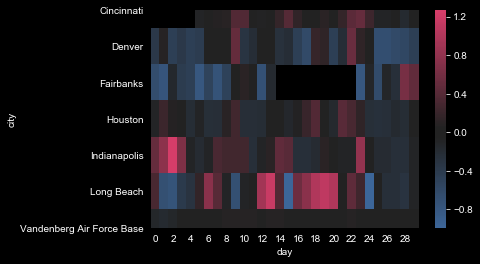

In [49]:
# Dark plot background
plt.style.use("dark_background")

# Modify palette for dark background
color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)

# Pass palette to plot and set center
sns.heatmap(nov_2015_CO,
            cmap = color_palette,
            center = 0)
plt.yticks(rotation = 0)

### Using a custom categorical palette

When you have a line chart with lots of categories choosing your palette carefully is essential. Often default palettes have very similar hues, that are hard to differentiate when spread over the small surface of a line. ColorBrewer palettes are built with this in mind and keep the colors as distinct as possible.

In this exercise, you will make a line plot of the O3 values over the year of 2013 for all the cities where the color of each line is encoded by city. You will use the ColorBrewer palette `'Set2'` to improve upon the default color scheme.

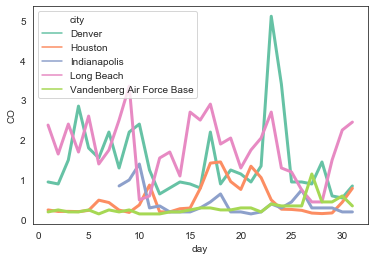

In [58]:
sns.set_style("white")

# Filter our data to Jan 2013
pollution_jan13 = pollution.query('year  ==  2013 & month  ==  1')

# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x = "day", 
             y = "CO", 
             # Encode the color of the lines as the city.
             hue = "city",
             # Change the palette to the 'Set2' ColorBrewer palette.
             palette = "Set2", 
             linewidth = 3,
             data = pollution_jan13)
plt.show()

### Dealing with too many categories

Sometimes you may be short on figure space and need to show a lot of data at once. Here you want to show the year-long trajectory of every pollutant for every city in the pollution dataset. Each pollutant trajectory will be plotted as a line with the y-value corresponding to standard deviations from year's average. This means you will have a lot of lines on your plot at once -- way more than you could separate clearly with color.

To deal with this, you have decided to highlight on a small subset of city pollutant combinations (`wanted_combos`). This subset is the most important to you, and the other trajectories will provide valuable context for comparison. To focus attention, you will set all the non-highlighted trajectories lines to of the same 'other' color.

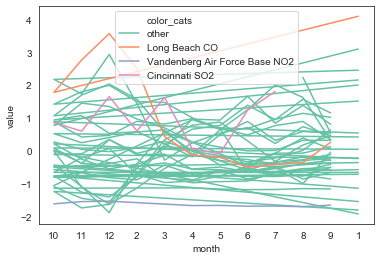

In [60]:
sns.set_style("white")
city_pol_month = pd.read_csv('city_pol_month.csv')

# Choose the combos that get distinct colors
wanted_combos = ['Vandenberg Air Force Base NO2', 'Long Beach CO', 'Cincinnati SO2']

# Assign a new column to DataFrame for isolating the desired combos
city_pol_month['color_cats'] = [x if x in wanted_combos else 'other' for x in city_pol_month['city_pol']]

# Plot lines with color driven by new column and lines driven by original categories
sns.lineplot(x = "month",
             y = "value",
             hue = 'color_cats',
             units = 'city_pol',
             estimator = None,
             palette = 'Set2',
             data = city_pol_month)

### Coloring ordinal categories

You are working for the Des Moines city council to assess the associations of various pollutant levels in the city. The two most important pollutants are $SO_2$ and $NO_2$ but CO is also of interest. You've only been allowed enough space for a single plot for your part of the report.

You start with a scatter plot of the $SO_2$ and $NO_2$ values as they are most important and then decide to show the CO values using a color scale corresponding to CO quartiles. By binning the continuous CO values, you have turned CO into an ordinal variable that can illuminate broad patterns without requiring much effort from the viewer to compare subtly different shades.

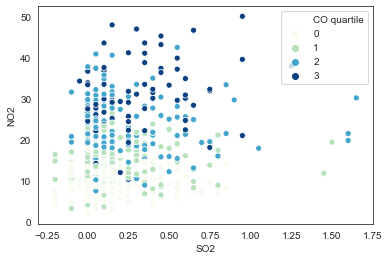

In [61]:
# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

# Filter to just Des Moines
des_moines = pollution.query("city  ==  'Des Moines'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                data = des_moines,
                # Change the palette to the ColorBrewer palette 'GnBu'
                palette = 'GnBu')

### Choosing the right variable to encode with color

You're tasked with visualizing pollution values for Long Beach and nearby cities over time. The supplied code makes the below (hard-to-read plot), which consists of maximum pollution values (provided as `max_pollutant_values`) with the bars colored by the city.

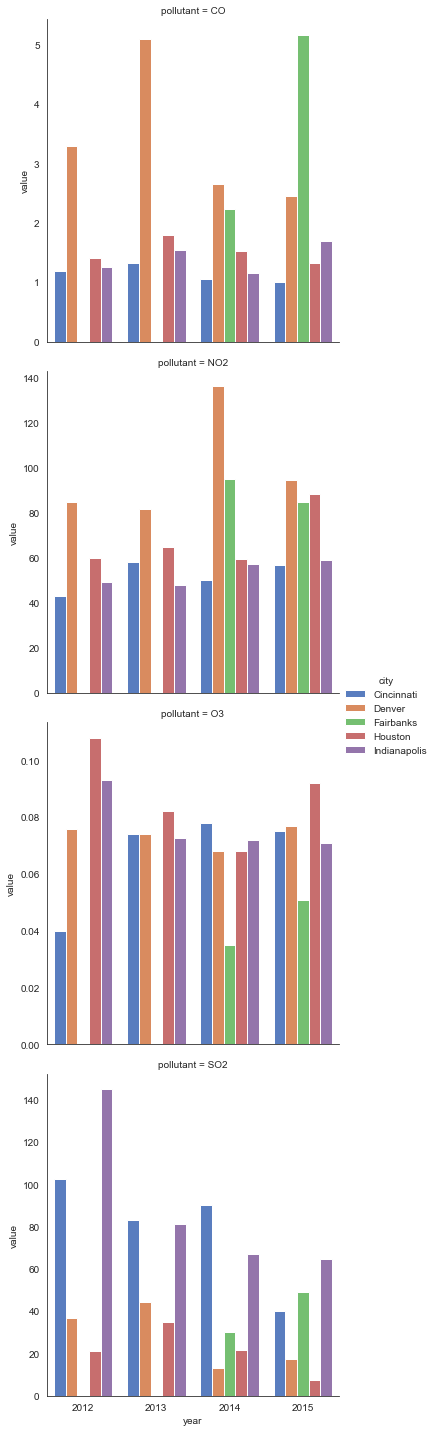

In [62]:
max_pollutant_values = pd.read_csv('max_pollutant_values.csv')

cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver', 
          'Indianapolis', 'Des Moines', 'Cincinnati', 'Houston']

city_maxes = max_pollutant_values[max_pollutant_values.city.isin(cities)]

sns.catplot(x = 'year', hue = 'city',
              y = 'value', row = 'pollutant',    
              data = city_maxes, palette = 'muted',
              sharey = False, kind = 'bar')

You can quickly improve this with a few tweaks. By modifying the cities shown to only those in the western half of the country you will avoid clutter. Next, swapping the color-encoding from city to year allows you to use an ordinal palette, saving the reader from continually referring to the legend to check which color corresponds to which city.

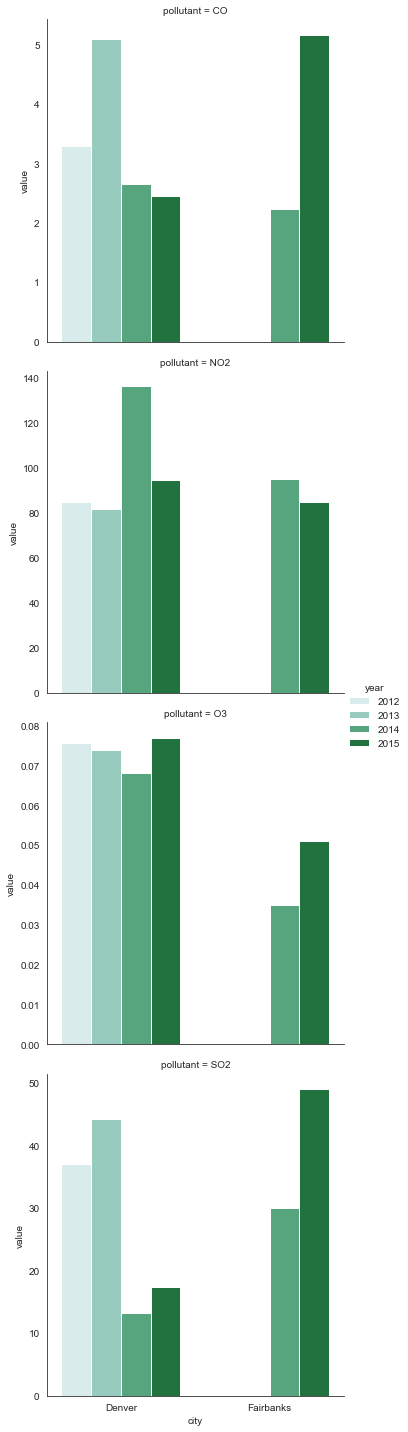

In [65]:
# Reduce to just cities in the western half of US
cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver']

# Filter data to desired cities
city_maxes = max_pollutant_values[max_pollutant_values.city.isin(cities)]

# Swap city and year encodings
sns.catplot(x = 'city', hue = 'year',
              y = 'value', row = 'pollutant',    
              # Change palette to one appropriate for ordinal categories
              data = city_maxes, palette = 'BuGn',
              sharey = False, kind = 'bar')